# Modelos de Clasificacion

In [1]:
%matplotlib notebook

In [ ]:
#pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, roc_curve

In [3]:
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
  
### 1 maligno, 0 benigno
y.Class = (y.Class==4).astype(int)
X = X.drop(columns = 'Bare_nuclei')

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [4]:
# Ajustar un modelo logit
X = sm.add_constant(X)

model1 = sm.Logit(y, X)
result1 = model1.fit()

Optimization terminated successfully.
         Current function value: 0.100619
         Iterations 9


In [5]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  699
Model:                          Logit   Df Residuals:                      690
Method:                           MLE   Df Model:                            8
Date:                Sat, 04 Nov 2023   Pseudo R-squ.:                  0.8438
Time:                        08:31:55   Log-Likelihood:                -70.333
converged:                       True   LL-Null:                       -450.26
Covariance Type:            nonrobust   LLR p-value:                9.174e-159
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -9.9456      1.032     -9.634      0.000     -11.969      -7.922
Clump_thickness                 0.5776      0.119      4.852      0.000       0.344       0.811
Uniformity_of_cell_size        -0.0116      0.176     -0.066      0.948      -0.356       0.333
Uniformity_of_cell_shape        0.5679      0.191      2.969      0.003       0.193       0.943
Marginal_adhesion               0.3137      0.100      3.125      0.002       0.117       0.510
Single_epithelial_cell_size     0.1306      0.141      0.929      0.353      -0.145       0.406
Bland_chromatin                 0.5800      0.146      3.984      0.000       0.295       0.865
Normal_nucleoli                 0.1232      0.099      1.248      0.212      -0.070       0.317
Mitoses                         0.6079      0.324      1.875      0.061      -0.027       1.243
===============================================================================================
"""

### Efectos marginales modelo de regresion logistica

In [6]:
### Efecto marginal para el escenario del cancer
margeff1 = result1.get_margeff()
print(margeff1.margeff)

[ 0.01572002 -0.00031444  0.01545791  0.00853767  0.00355361  0.01578494
  0.00335302  0.01654438]


In [7]:
# Otro ejemplo
np.random.seed(0)
n = 100
score = np.random.normal(50, 10, n)
grades = np.random.normal(3.0, 0.5, n)
admitted = np.random.binomial(1, 0.5, n)

# Crear un dataframe
data = pd.DataFrame({'Score': score, 'Grades': grades, 'Admitted': admitted})

In [8]:
# Ajustar un modelo logit
y_1 = data['Admitted']
X_1 = data[['Score', 'Grades']]
X_1 = sm.add_constant(X_1)
model = sm.Logit(y_1, X_1)
result = model.fit()

# Calcular las probabilidades
data['Probability'] = result.predict(X_1)

Optimization terminated successfully.
         Current function value: 0.681178
         Iterations 4


In [9]:
margeff = result.get_margeff()
print(margeff.margeff)

[-0.00511795  0.06558986]


In [10]:
# Mostrar los resultados
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               Admitted   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sat, 04 Nov 2023   Pseudo R-squ.:                 0.01012
Time:                        08:36:27   Log-Likelihood:                -68.118
converged:                       True   LL-Null:                       -68.814
Covariance Type:            nonrobust   LLR p-value:                    0.4985
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0401      1.495      0.027      0.979      -2.889       2.970
Score         -0.0210      0.020     -1.027      0.304      -0.061       0.019
Grades         0.2687      0.395      0.681      0.4

## Procesamiento de los datos

In [11]:
### Particionamiento en train, validation  test
X_train, X_tem, y_train, y_tem = train_test_split(X, 
                                                    y,
                                                    stratify = y,
                                                    test_size=0.4, 
                                                    random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_tem, 
                                                y_tem,
                                                stratify = y_tem,
                                                test_size=0.5, 
                                                random_state=42)

In [12]:
### Escalar el conjunto de datos
scaler = StandardScaler()
X_train_z = scaler.fit_transform(X_train)
X_val_z = scaler.transform(X_val)
X_test_z = scaler.transform(X_test)

### guardar nombre de las variables
var_names = X.columns

In [13]:
# Crear un modelo de regresión logística
model_rl = LogisticRegression()

# Ajustar el modelo con los datos de entrenamiento
model_rl.fit(X_train_z, y_train)

# Hacer predicciones en el conjunto de validacion
y_pred = model_rl.predict(X_val_z)
y_pred_score = model_rl.predict_proba(X_val_z)[:,1]

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy del modelo: {accuracy}")

# Mostrar la matriz de confusión y el informe de clasificación
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred))

print("\nInforme de clasificación:")
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_score)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC-AUC: {roc_auc}')

Accuracy del modelo: 0.9785714285714285
Matriz de confusión:
[[89  2]
 [ 1 48]]

Informe de clasificación:
Precision: 0.96
Recall: 0.9795918367346939
ROC-AUC: 0.99887867234806


In [16]:
### Curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_score)

<IPython.core.display.Javascript object>


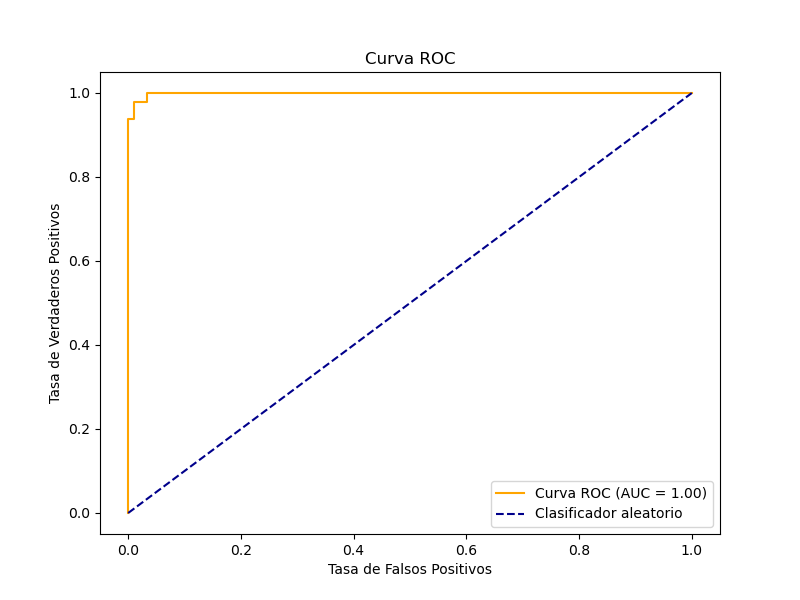

In [17]:
# Graficar la curva ROC
plt.figure('ROC Regresion Logistica',figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Clasificador aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

## Cross Validation

In [18]:
# Initialize the LOOCV
loo = LeaveOneOut()

y_pred_vec = []
y_true_vec = []
# Perform LOOCV
for train_index, test_index in loo.split(X_train_z):
    X_train_cv, X_test_cv = X_train_z[train_index], X_train_z[test_index]
    y_train_cv, y_test_cv = y_train.values[train_index], y_train.values[test_index]

    # Fit the model
    model_cv = LogisticRegression()
    model_cv.fit(X_train_cv, y_train_cv)

    # Make predictions
    y_pred = model_cv.predict(X_test_cv)

    # Print the results for each iteration
    #print(f"True value: {y_test_cv[0]}, Predicted value: {y_pred[0]}")

    y_pred_vec.append(y_pred[0])
    y_true_vec.append(y_test_cv[0])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [20]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_true_vec, y_pred_vec)
print(f"accuracy del modelo: {accuracy}")

# Mostrar la matriz de confusión y el informe de clasificación
print("Matriz de confusión:")
print(confusion_matrix(y_true_vec, y_pred_vec))

print("\nInforme de clasificación:")
precision = precision_score(y_true_vec, y_pred_vec)
recall = recall_score(y_true_vec, y_pred_vec)

print(f'Precision: {precision}')
print(f'Recall: {recall}')

accuracy del modelo: 0.9522673031026253
Matriz de confusión:
[[267   8]
 [ 12 132]]

Informe de clasificación:
Precision: 0.9428571428571428
Recall: 0.9166666666666666


## K Folds

In [21]:
# Define the number of folds
k = 3

# Initialize the KFold
kf = KFold(n_splits=k)

recall_vec = []
precision_vec = []
accuracy_vec = []
# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_train_z):
    X_train_cv, X_test_cv = X_train_z[train_index], X_train_z[test_index]
    y_train_cv, y_test_cv = y_train.values[train_index], y_train.values[test_index]

    # Fit the model
    model_cv = LogisticRegression()
    model_cv.fit(X_train_cv, y_train_cv)

    # Make predictions
    y_pred = model_cv.predict(X_test_cv)
    
    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test_cv, y_pred)
    precision = precision_score(y_test_cv, y_pred)
    recall = recall_score(y_test_cv, y_pred)
    
    recall_vec.append(recall)
    precision_vec.append(precision)
    accuracy_vec.append(accuracy)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
print(f'Recall: {np.mean(recall_vec)}')
print(f'Precision: {np.mean(precision_vec)}')
print(f'Accuracy: {np.mean(accuracy_vec)}')

Recall: 0.9095624065228929
Precision: 0.94
Accuracy: 0.9475334018499485


## Regresion Logistica con Regularizacion

### Lasso

In [23]:
model_rg_lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=0)

# Definir los parámetros para la búsqueda
parameters = {'C': np.logspace(-3, 3, 100)}  # Rango de valores de C para probar

# Realizar la búsqueda de cuadrícula para encontrar el mejor valor de C
clf = GridSearchCV(model_rg_lasso, parameters, cv=5)
clf.fit(X_train_z, y_train)

# Obtener el mejor valor de C
best_C = clf.best_params_['C']
print(f"Mejor valor de C: {best_C}")

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Mejor valor de C: 0.02848035868435802


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
### Seleccion de variables
df_vars = pd.DataFrame()
df_vars['vars'] = var_names.values
df_vars['Coef'] = clf.best_estimator_.coef_[0]
df_vars

,vars,Coef
0,const,0.000000
1,Clump_thickness,0.491684
2,Uniformity_of_cell_size,0.511755
3,Uniformity_of_cell_shape,0.571854
4,Marginal_adhesion,0.315710
5,Single_epithelial_cell_size,0.000000
6,Bland_chromatin,0.368478
7,Normal_nucleoli,0.045710
8,Mitoses,0.000000


In [25]:
# Ajustar el modelo con el mejor valor de C
model_rg_lasso = LogisticRegression(penalty='l1', C=best_C, solver='liblinear', random_state=0)
model_rg_lasso.fit(X_train_z, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model_rg_lasso.predict(X_val_z)
y_pred_score = model_rg_lasso.predict_proba(X_val_z)[:,1]

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_val, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Mostrar la matriz de confusión y el informe de clasificación
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred))

print("\nInforme de clasificación:")
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_score)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC-AUC: {roc_auc}')

Precisión del modelo: 0.9714285714285714
Matriz de confusión:
[[88  3]
 [ 1 48]]

Informe de clasificación:
Precision: 0.9411764705882353
Recall: 0.9795918367346939
ROC-AUC: 0.9986544068176721


### Ridge

In [27]:
model_rg_ridge = LogisticRegression(penalty='l2', solver='lbfgs', random_state=0)

# Definir los parámetros para la búsqueda
parameters = {'C': np.logspace(-3, 3, 100)}  # Rango de valores de C para probar

# Realizar la búsqueda de cuadrícula para encontrar el mejor valor de C
clf = GridSearchCV(model_rg_ridge, parameters, cv=5)
clf.fit(X_train_z, y_train)

# Obtener el mejor valor de C
best_C = clf.best_params_['C']
print(f"Mejor valor de C: {best_C}")

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Mejor valor de C: 1.4174741629268048


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [28]:
### Seleccion de variables
df_vars = pd.DataFrame()
df_vars['vars'] = var_names.values
df_vars['Coef'] = clf.best_estimator_.coef_[0]
df_vars

,vars,Coef
0,const,0.000000
1,Clump_thickness,1.983836
2,Uniformity_of_cell_size,0.218568
3,Uniformity_of_cell_shape,1.169185
4,Marginal_adhesion,1.319673
5,Single_epithelial_cell_size,0.636063
6,Bland_chromatin,1.380467
7,Normal_nucleoli,0.009197
8,Mitoses,0.397857


In [29]:
# Ajustar el modelo con el mejor valor de C
model_rg_ridge = LogisticRegression(penalty='l2', C=best_C, solver='lbfgs', random_state=0)
model_rg_ridge.fit(X_train_z, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model_rg_ridge.predict(X_val_z)
y_pred_score = model_rg_ridge.predict_proba(X_val_z)[:,1]

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_val, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Mostrar la matriz de confusión y el informe de clasificación
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred))

print("\nInforme de clasificación:")
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_score)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC-AUC: {roc_auc}')

Precisión del modelo: 0.9785714285714285
Matriz de confusión:
[[89  2]
 [ 1 48]]

Informe de clasificación:
Precision: 0.96
Recall: 0.9795918367346939
ROC-AUC: 0.99887867234806


## KNN

In [31]:
# Create a KNN classifier with a specified number of neighbors (e.g., 3)
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn.fit(X_train_z, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_val_z)
y_pred_score = knn.predict_proba(X_val_z)[:,1]

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [32]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_val, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Mostrar la matriz de confusión y el informe de clasificación
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred))

print("\nInforme de clasificación:")
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_score)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC-AUC: {roc_auc}')

Precisión del modelo: 0.9642857142857143
Matriz de confusión:
[[88  3]
 [ 2 47]]

Informe de clasificación:
Precision: 0.94
Recall: 0.9591836734693877
ROC-AUC: 0.9865440681767212


## Naive Bayes

In [33]:
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train_z, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_val_z)
y_pred_score = knn.predict_proba(X_val_z)[:,1]

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_val, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Mostrar la matriz de confusión y el informe de clasificación
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred))

print("\nInforme de clasificación:")
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_score)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC-AUC: {roc_auc}')

Precisión del modelo: 0.9714285714285714
Matriz de confusión:
[[87  4]
 [ 0 49]]

Informe de clasificación:
Precision: 0.9245283018867925
Recall: 1.0
ROC-AUC: 0.9865440681767212


## LDA

In [35]:
# Create an LDA classifier
lda = LinearDiscriminantAnalysis()

# Fit the classifier to the training data
lda.fit(X_train_z, y_train)

# Make predictions on the test data
y_pred = lda.predict(X_val_z)
y_pred_score = lda.predict_proba(X_val_z)[:,1]

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_val, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Mostrar la matriz de confusión y el informe de clasificación
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred))

print("\nInforme de clasificación:")
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_score)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC-AUC: {roc_auc}')

Precisión del modelo: 0.9785714285714285
Matriz de confusión:
[[90  1]
 [ 2 47]]

Informe de clasificación:
Precision: 0.9791666666666666
Recall: 0.9591836734693877
ROC-AUC: 0.998654406817672


## Ajuste de Hiperparametros

### GridSearch

In [37]:
# Definir los parámetros para la búsqueda de cuadrícula
param_grid = {
    'penalty': ['l1', 'l2', None],
    'C': np.logspace(-4, 4, 100),
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 1000, 10000]
}

# Crear un modelo de regresión logística
model = LogisticRegression()

# Realizar la búsqueda de cuadrícula exhaustiva para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(model, 
                           param_grid, 
                           cv=5, 
                           verbose=1, 
                           n_jobs=-1,
                           scoring = 'f1')
grid_search.fit(X_train_z, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Ajustar el modelo con los mejores hiperparámetros
best_model = LogisticRegression(**best_params)
best_model.fit(X_train_z, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_val)
y_pred_score = best_model.predict_proba(X_val_z)[:,1]

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/pytho

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/pytho

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [38]:
print(f"Mejores hiperparámetros: {best_params}")

Mejores hiperparámetros: {'C': 0.0001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [39]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_val, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Mostrar la matriz de confusión y el informe de clasificación
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred))

print("\nInforme de clasificación:")
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_score)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC-AUC: {roc_auc}')

Precisión del modelo: 0.35
Matriz de confusión:
[[ 0 91]
 [ 0 49]]

Informe de clasificación:
Precision: 0.35
Recall: 1.0
ROC-AUC: 0.9970845481049563


## Random Search

In [40]:
# Definir los parámetros para la búsqueda de cuadrícula
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 100),
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 1000, 10000]
}

# Crear un modelo de regresión logística
model = LogisticRegression()

# Realizar la búsqueda de cuadrícula exhaustiva para encontrar los mejores hiperparámetros
random_search = RandomizedSearchCV(model, 
                                   param_grid, 
                                   cv=5, 
                                   verbose=1, 
                                   n_jobs=-1,
                                   scoring = 'f1',
                                   n_iter=20)
random_search.fit(X_train_z, y_train)

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_

# Ajustar el modelo con los mejores hiperparámetros
best_model = LogisticRegression(**best_params)
best_model.fit(X_train_z, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_val)
y_pred_score = best_model.predict_proba(X_val_z)[:,1]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [41]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_val, y_pred)
print(f"Precisión del modelo: {accuracy}")

# Mostrar la matriz de confusión y el informe de clasificación
print("Matriz de confusión:")
print(confusion_matrix(y_val, y_pred))

print("\nInforme de clasificación:")
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_score)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC-AUC: {roc_auc}')

Precisión del modelo: 0.35
Matriz de confusión:
[[ 0 91]
 [ 0 49]]

Informe de clasificación:
Precision: 0.35
Recall: 1.0
ROC-AUC: 0.9970845481049563
